In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [28]:
import numpy as np
import pandas as pd
import datetime as dt
from datetime import datetime
from dateutil.relativedelta import relativedelta

# Reflect Tables into SQLAlchemy ORM

In [10]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect = True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [11]:
# Measurement columns
inspector = inspect(engine)
columns = inspector.get_columns('measurement')
for c in columns:
    print(f"{c['name']:<20} {c['type']}")

id                   INTEGER
station              TEXT
date                 TEXT
prcp                 FLOAT
tobs                 FLOAT


In [12]:
# Station columns
inspector = inspect(engine)
columns = inspector.get_columns('station')
for c in columns:
    print(f"{c['name']:<20} {c['type']}")

id                   INTEGER
station              TEXT
name                 TEXT
latitude             FLOAT
longitude            FLOAT
elevation            FLOAT


In [65]:
# Find the most recent date in the data set.
sel = [Measurement.date]
newest_date = session.query(*sel).order_by(Measurement.date.desc()).first()[0]
print(f"The most recent record was recorded on: {newest_date}.")

The most recent record was recorded on: 2017-08-23.


In [81]:
# split string to break out year, mo, day
nd = newest_date.split('-')
nd
# cast strings as int
for i in range(len(nd)):
    nd[i] = int(nd[i])
nd
# store as datetime object
nd_dt = dt.date(nd[0], nd[1], nd[2])
nd_dt

datetime.date(2017, 8, 23)

In [138]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 


# Calculate the date one year from the last date in data set.
one_year_previous = nd_dt - dt.timedelta(days=365)
one_year_previous

# Perform a query to retrieve the data and precipitation scores
last_year = session.query(Measurement.station, Measurement.date, Measurement.prcp, Measurement.tobs).\
    filter(Measurement.date <= newest_date).filter(Measurement.date >= one_year_previous).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
last_year_df = pd.DataFrame(last_year, columns=['station','date','prcp','tobs'])
last_year_df['date'] = pd.to_datetime(last_year_df['date'], format='%Y-%m-%d')
last_year_df = last_year_df.set_index('date')

# Sort the dataframe by date
last_year_df.sort_values(by=['date'], inplace=True)
last_year_df.head()

,station,prcp,tobs
date,,,
2016-08-23,USC00519397,0.00,81.0
2016-08-23,USC00517948,NaN,80.0
2016-08-23,USC00519281,1.79,77.0
2016-08-23,USC00514830,0.05,80.0
2016-08-23,USC00513117,0.15,76.0


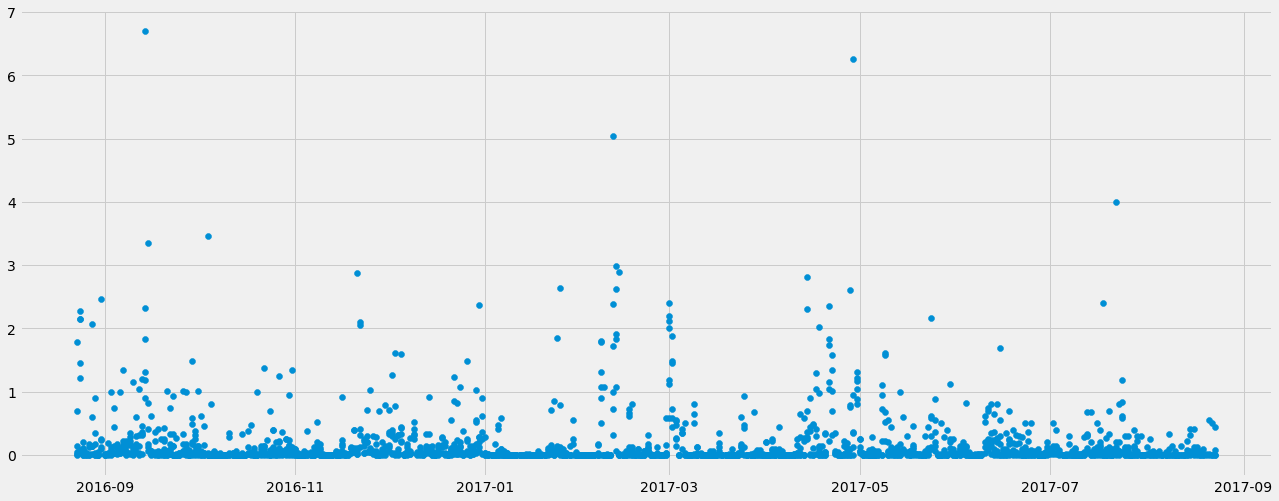

In [147]:
# Use Pandas Plotting with Matplotlib to plot the data
no_index = last_year_df.reset_index()
date_list = no_index['date']
date_list
precip_list = no_index['prcp']
precip_list

plt.figure(figsize=(20,8))
plt.scatter(date_list, precip_list)
#plt.locator_params(axis='x', tight=True, nbins=13)



#plt.xticks(rotation='vertical')
plt.show()

In [142]:
# Use Pandas to calculate the summary statistics for the precipitation data
last_year_df['prcp'].describe()

count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: prcp, dtype: float64

# Exploratory Station Analysis

In [ ]:
# Design a query to calculate the total number stations in the dataset


In [ ]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.


In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close session

In [ ]:
# Close Session
session.close()